# Pattern Recognition Mini Project 1
# Part-2 Training & Prediction

## TODO:

- [x] DeBug MLE fit
- [x] Index Issue solve - Change for loop
- [x] Include Extra State
- [x] Debug simulate


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete
from scipy.stats import bernoulli

In [2]:
url='clean_android.csv'
df=pd.read_csv(url)
print("df.shape = ", df.shape)
print("df.columns: ", list(df.columns))

def select_apps(df):
    app_cols = [match for match in list(df.columns) if "packages_running_" in match]
    return df[app_cols]

# df_apps: contains only app columns
df_apps = select_apps(df)
print("df_apps.shape = ", df_apps.shape)
print("df_apps.columns: ", list(df_apps.columns))

df.shape =  (2258, 40)
df.columns:  ['battery_level', 'day', 'month', 'packages_running_ch.smalltech.battery.free', 'packages_running_com.android.bluetooth', 'packages_running_com.android.chrome', 'packages_running_com.android.contacts', 'packages_running_com.android.defcontainer', 'packages_running_com.android.mms', 'packages_running_com.android.musicfx', 'packages_running_com.android.providers.calendar', 'packages_running_com.android.settings', 'packages_running_com.android.vending', 'packages_running_com.google.android.apps.books', 'packages_running_com.google.android.apps.genie.geniewidget', 'packages_running_com.google.android.apps.plus', 'packages_running_com.google.android.apps.uploader', 'packages_running_com.google.android.browser', 'packages_running_com.google.android.calendar', 'packages_running_com.google.android.deskclock', 'packages_running_com.google.android.exchange', 'packages_running_com.google.android.gallery3d', 'packages_running_com.google.android.gm', 'packages_ru

## Predicting Battery Usage - MLE (LSE)

If we add bias for considering idle battery consumption of the phone; $y = 1*w_{bias} + x_{app_1}w_{app_1} + x_{app_2}w_{app_2} + ... + x_{app_n}w_{app_n}$

In [4]:
'''# sample per column
y = np.array(df['battery_level']).reshape((-1,1)) 
x = np.array(df_apps).T
x = np.vstack([x, np.ones(y.shape[0])]) # add bias

# convolve a kernel to use neighboor information for better y !!!!!!!!!!! (because some values are 0)
y_f = y.flatten()
y_n = np.convolve(y_f, [0.25, 0.5, 0.25], mode='same')
y_n = y_n.reshape(y.shape)

# Calculate the inverse
w_hat = np.linalg.pinv(x.T) @ y_n

print("x.shape:", x.shape)
print("y.shape:", y.shape) 
print("w_hat.shape (before splitting bias):", w_hat.shape)

bias = w_hat[-1,:]
w_hat_wo_bias = w_hat[:-1,:] # weights without bias

print("Battery usage per app: (value at the top using the most battery)")
print(bias, "[No apps are running. This is the bias value]\n")

s = np.argsort(w_hat_wo_bias.T).T # print starting from the app uses most battery
for i in s:
    print(w_hat_wo_bias[i,0]+bias, df_apps.columns[i].values) # specific_weight+bias is faster than using one-hot coded x in x.T@w 

# Calculate Mean Squared Error
y_pred = x.T @ w_hat 
lse = np.mean((y_n-y_pred)**2)
print("\nMean squared error:", lse)

# Plot
err = ( np.absolute(y-y_pred) ).T
err.sort()
plt.plot(err.T, '.')
plt.xlabel('samples sorted according to the error')
_=plt.ylabel('l1 error per sample')'''

'# sample per column\ny = np.array(df[\'battery_level\']).reshape((-1,1)) \nx = np.array(df_apps).T\nx = np.vstack([x, np.ones(y.shape[0])]) # add bias\n\n# convolve a kernel to use neighboor information for better y !!!!!!!!!!! (because some values are 0)\ny_f = y.flatten()\ny_n = np.convolve(y_f, [0.25, 0.5, 0.25], mode=\'same\')\ny_n = y_n.reshape(y.shape)\n\n# Calculate the inverse\nw_hat = np.linalg.pinv(x.T) @ y_n\n\nprint("x.shape:", x.shape)\nprint("y.shape:", y.shape) \nprint("w_hat.shape (before splitting bias):", w_hat.shape)\n\nbias = w_hat[-1,:]\nw_hat_wo_bias = w_hat[:-1,:] # weights without bias\n\nprint("Battery usage per app: (value at the top using the most battery)")\nprint(bias, "[No apps are running. This is the bias value]\n")\n\ns = np.argsort(w_hat_wo_bias.T).T # print starting from the app uses most battery\nfor i in s:\n    print(w_hat_wo_bias[i,0]+bias, df_apps.columns[i].values) # specific_weight+bias is faster than using one-hot coded x in x.T@w \n\n# Calcu

In [5]:
class Least_Squares_Regression():

    def __init__(self):
        self.weights = []
        self.attributes = []
        self.bias = 0
        pass
    
    def fit(self,df,y,bias=True,print_weights=False):

        X = np.array(df)
        row_no,attribute_no = df.shape
        self.attributes = []

        if bias == True:
            X = np.hstack((np.ones((row_no,1)),X))
            self.attributes.append('bias')

        self.attributes = self.attributes + df.columns.to_list()

        self.weights = np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,y))

        if bias == True:
            self.bias = self.weights[0]

        if print_weights == True:
            sorted_index = np.argsort(self.weights)
            for i in sorted_index:
                print(self.attributes[i],self.weights[i])
        
        
    def predict(self,df,bias=True):

        X = np.array(df)
        row_no,attribute_no = df.shape

        if bias == True:
            X = np.hstack((np.ones((row_no,1)),X))
        
        y_pred = np.dot(X,self.weights)
        return y_pred
        


In [6]:
model_linear = Least_Squares_Regression()
model_linear.fit(df_apps,df['battery_level'],print_weights = True)

bias -1.3927574457416698
packages_running_com.android.musicfx -0.8007226265396925
packages_running_de.kicktipp.mbookmark -0.4797222835728121
packages_running_com.rovio.angrybirdsspace.ads -0.44552306384150286
packages_running_com.halfbrick.fruitninjafree -0.4284123595712598
packages_running_com.google.android.location -0.27136033524555137
packages_running_com.google.android.gm -0.2669311271225887
packages_running_com.google.android.youtube -0.18313597087257788
packages_running_com.android.defcontainer -0.15126812061376055
packages_running_com.google.android.googlequicksearchbox -0.13261984170144903
packages_running_com.google.android.apps.uploader -0.12997323410304235
packages_running_com.google.android.apps.books -0.07085181085269898
packages_running_com.android.contacts -0.07063410925032437
packages_running_com.tf.thinkdroid.sg -0.06961262054631323
packages_running_com.google.android.partnersetup -0.0668091925510832
packages_running_com.google.android.browser -0.01868423401391467
pac

We look at the bar graph of the most negative weights and least negative weights and their associated attributes.

We can observe the effect of each app on the battery_level

In [7]:
N = 5

<BarContainer object of 5 artists>

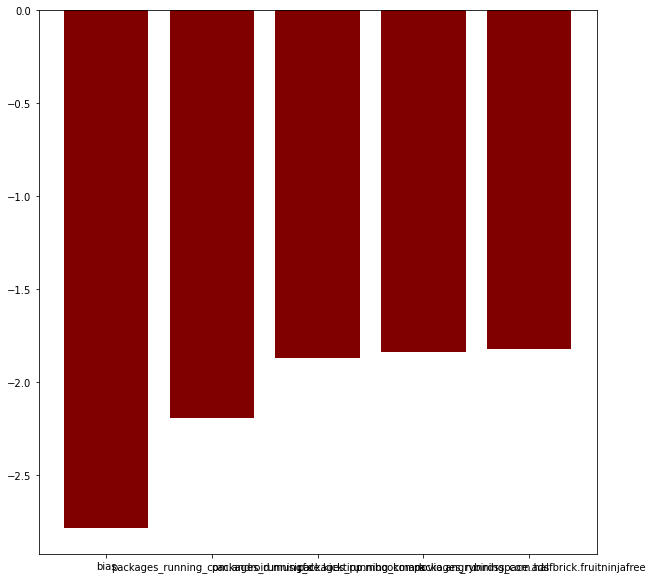

In [8]:
sorted_index = np.argsort(model_linear.weights)
bias = model_linear.bias
top_attributes = []
top_attributes_weights = []

for i in sorted_index[0:N]:
    top_attributes.append(model_linear.attributes[i])
    top_attributes_weights.append(model_linear.weights[i]+model_linear.bias)

fig = plt.figure(figsize = (10, 10)) 
  
# creating the bar plot 
plt.bar(top_attributes, top_attributes_weights, color ='maroon')

<BarContainer object of 5 artists>

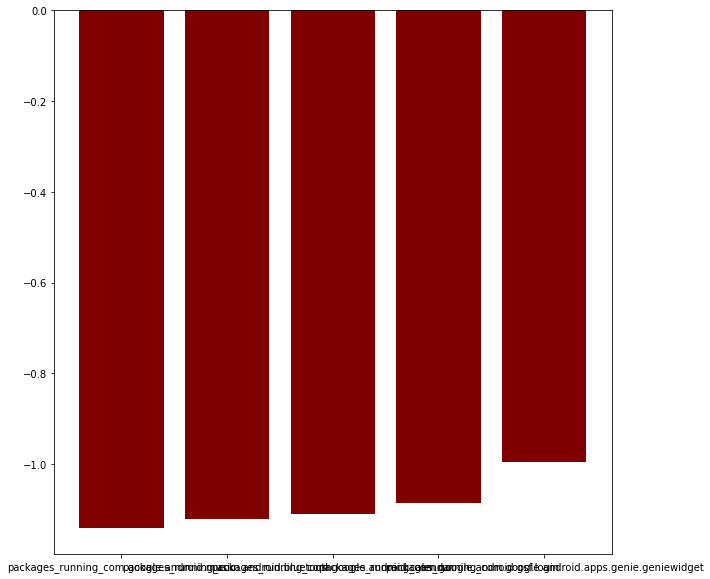

In [9]:
least_attributes = []
least_attributes_weights = []

for i in sorted_index[-(N+1):-1]:
    least_attributes.append(model_linear.attributes[i])
    least_attributes_weights.append(model_linear.weights[i]+model_linear.bias)

fig = plt.figure(figsize = (10, 10)) 
  
# creating the bar plot 
plt.bar(least_attributes, least_attributes_weights, color ='maroon')

## Leave One Out Validation 
We use all except one row of the data for training and test our model against the remaining row. 

We do this by looping over all rows. 

Since the number of data points is low, this can be done efficiently.


In [10]:
def Leave_One_Out_Validation(data,output,model):
    row_no = data.shape[0]

    #Reindexing so as to loop through the rows
    df = data
    y = output
    df.index = range(row_no)
    y.index = range(row_no)

    y_pred = []

    for i in range(row_no):
        model.fit(df.drop([i]),y.drop([i]))
        y_pred.append(model.predict(df.iloc[[i]]))

    y_pred = np.array(y_pred)
    return y_pred.reshape(-1)


In [11]:
model_linear = Least_Squares_Regression()

In [12]:
y = np.array(df['battery_level'])
y_pred = Leave_One_Out_Validation(df_apps,df['battery_level'],model_linear)


Scatter Plot of predicted battery_level change and actual battery level change vs time

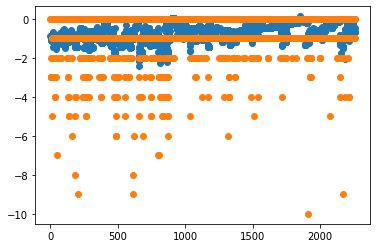

In [13]:
plt.scatter(range(y_pred.shape[0]),y_pred)
plt.scatter(range(y_pred.shape[0]),df['battery_level'])
plt.show()

Scatter Plot of actual battery level change vs predicted battery_level change

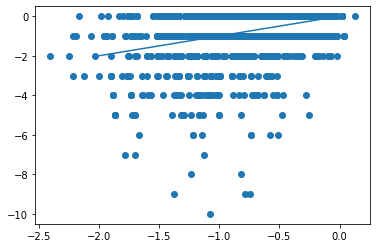

In [14]:
plt.scatter(y_pred,df['battery_level'])
plt.plot(np.linspace(-2,0),np.linspace(-2,0))
plt.show()

## Validation and Training Errors
**Checking for over/under fitting**

while n in no of rows:

    Diff in Error in predicting nth value after knowing all n values and after knowing n-1 values.

In [15]:
def validation_training_error(model_train,model_validate,df,y):
    row_no = df.shape[0]

    error_validate = []
    y_validate = []
    error_train = []
    y_train = []
    
    for row in range(row_no-1):
        model_validate.fit(df.iloc[0:row],y[0:row])
        model_train.fit(df.iloc[0:row+1],y[0:row+1])

        y_validate.append(model_validate.predict(df.iloc[[row+1]]))
        y_train.append(model_train.predict(df.iloc[[row+1]]))

        error_validate.append(abs(model_validate.predict(df.iloc[[row+1]])-y[row+1]))
        error_train.append(abs(model_train.predict(df.iloc[[row+1]])-y[row+1]))

    samples_trained = np.array(range(row_no-1)) + 1

    plt.plot(samples_trained,y[1:],'b',label = 'Actual_y')
    plt.plot(samples_trained,y_validate,'r',label='Validation_y')
    plt.plot(samples_trained,y_train,'y',label='train_y')
    plt.show()


    avg_error_validate = sum(error_validate) / (row_no  - 1)
    avg_error_train = sum(error_train) / (row_no - 1)

    #print(np.array(y_validate)-np.array(y_train))
    print('Validation error is', avg_error_validate, 'Training error is', avg_error_train)


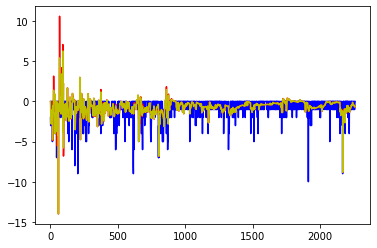

Validation error is [0.84176734] Training error is [0.78786332]


In [16]:
model_train = Least_Squares_Regression()
model_validate = Least_Squares_Regression()

validation_training_error(model_train,model_validate,df_apps,df['battery_level'])


It can be observed from the graph that the model tends to have high bias and low variance.

If we wanted to improve our accuracy, we should choose a more complicated model or manage to get more data.

## 2. Markov Chain State Prediction Model

The main model we are interested in using is the MLE model. 

But in order to judge it's effectiveness we first use a simpler baseline model.
Baseline model assumptions - 

1. We assume each apps run independently of time,the current state and off other apps and the proability that an app is running is p_app

2. We estimate p_app using the proportion of times that app is running


**Dealing with non seen states**

We only consider the states which we see in our testing data. All other possible states not visible in test data will be made into one state called EXTRA. 

We estimate Prob(Extra,s) as being directly proportional to the no of visits to state s


In [17]:
#Baseline Independent Bernoulli model
class independent_bernoulli():
    def __init__(self):
        self.probabilities = []
        self.state_labels = []
        pass
    
    #Assuming categorical binary attributes
    def fit(self,df):
        self.probabilities = df.sum() / df.shape[0]
        self.state_labels = df.columns
        
    
    def simulate_once(self,state=None):
        new_state = []
        for p in self.probabilities:
            new_state.append(bernoulli.rvs(p, size = 1))
        return new_state

    def predict_df(self,number,state=None):
        y_pred = []
        for time in range(number):
            y_pred.append(self.simulate_once())

        next_states = np.array(y_pred)
        return pd.DataFrame(y_pred,columns = self.state_labels)


We split the data for training and validation

In [18]:
def split_data(df,percentage = 0.8):
    train_size = int(percentage * df.shape[0])
    df_train = df.iloc[:train_size]
    df_test = df.iloc[train_size:]
    return df_train,df_test


In [19]:
df_apps_train, df_apps_test = split_data(df_apps,0.85)
y_train, y_test = split_data(df['battery_level'],0.85)


In [20]:
model_baseline = independent_bernoulli()
model_baseline.fit(df_apps_train)

In [21]:
model_baseline.probabilities

packages_running_ch.smalltech.battery.free                              0.655029
packages_running_com.android.bluetooth                                  0.011985
packages_running_com.android.chrome                                     0.115685
packages_running_com.android.contacts                                   0.463262
packages_running_com.android.defcontainer                               0.595102
packages_running_com.android.mms                                        0.458051
packages_running_com.android.musicfx                                    0.113080
packages_running_com.android.providers.calendar                         0.768108
packages_running_com.android.settings                                   0.239187
packages_running_com.android.vending                                    0.670662
packages_running_com.google.android.apps.books                          0.981240
packages_running_com.google.android.apps.genie.geniewidget              0.647733
packages_running_com.google.

In [22]:
df_pred_baseline = model_baseline.predict_df(df_apps_test.shape[0])

## Error evaluation

Error in prediction is the L2 norm of the predicted state and the actual state both of which lies in Eucledian space.

In [23]:
 #Error in prediction is L2 norm of diff in state vectors.
def evaluate_error(y_pred,y_actual):
    if y_pred.shape != y_actual.shape:
      print("Shape Mismatch")
      return

    #reindex
    df1 = y_pred
    df1.index = range(y_pred.shape[0])
    df2 = y_actual
    df2.index = range(y_actual.shape[0])

    errors = []
    times = []
    for row in range(y_pred.shape[0]):
      times.append(row+1)
      errors.append(np.linalg.norm(df1.iloc[row]-df2.iloc[row].tolist()))
    
    plt.plot(times,errors)


    diff_df = np.abs(df1.add(-1 * df2))
    diff_df_column_proportion = (diff_df.sum())/diff_df.shape[0]
    return diff_df_column_proportion , (diff_df_column_proportion.sum())/diff_df.shape[1]
    

(packages_running_ch.smalltech.battery.free                              0.348083
 packages_running_com.android.bluetooth                                  0.020649
 packages_running_com.android.chrome                                     0.129794
 packages_running_com.android.contacts                                   0.507375
 packages_running_com.android.defcontainer                               0.563422
 packages_running_com.android.mms                                        0.519174
 packages_running_com.android.musicfx                                    0.079646
 packages_running_com.android.providers.calendar                         0.386431
 packages_running_com.android.settings                                   0.256637
 packages_running_com.android.vending                                    0.421829
 packages_running_com.google.android.apps.books                          0.023599
 packages_running_com.google.android.apps.genie.geniewidget              0.380531
 packages_runnin

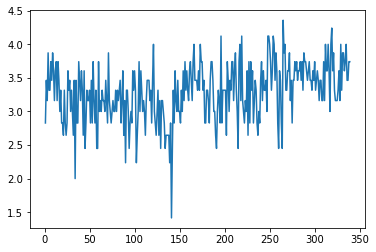

In [24]:
evaluate_error(df_pred_baseline,df_apps_test)

## Markov Chain Model - MLE

We assume a markov chain model on the state space.

We assume that the probability of going from state i to state j is equal to the no of visits from i to j divided by the total no of visits to i

In [25]:
class markov_chain():
  def __init__(self):
    self.states = []
    #eg states = [(0,0,0,1) , (1,0,1,0)]
    self.transition_probability = {}
    #eg transition probs = {(0,0,0,1):{(0,0,0,1):0.5, (1,0,1,0):0.5},(1,0,1,0):{(0,0,0,1):0,(1,0,1,0):1}}
    self.state_labels = []
    # eg is ["app1","app2","app3","android"]
    pass    


  def fit(self,df_og,unseen_state=True):
    freq_states = {}
    transition_numbers = {}

    self.state_labels = list(df_og.columns)

    # Reindexing the dataframe
    df = df_og
    df.index = range(len(df.index))
  
    for i in range(len(df.index)-1): 
      curr_state = tuple(df.loc[i,:])

      if curr_state not in freq_states.keys():
        transition_numbers[curr_state] = {}
        freq_states[curr_state] = 1

      else:
        freq_states[curr_state]+=1
      
      future_state = tuple(df.loc[i+1,:])

      if future_state not in transition_numbers[curr_state].keys():
        transition_numbers[curr_state][future_state] = 1

      else: 
        transition_numbers[curr_state][future_state]+=1



    if unseen_state:
      curr_state = 'UNSEEN'
      transition_numbers[curr_state] = freq_states.copy()
      freq_states[curr_state] = len(df.index) - 1
 



    self.states = list(freq_states.keys())
    transition_probs = {curr_state: {future_state: (transition_numbers[curr_state][future_state])/freq_states[curr_state] for future_state in transition_numbers[curr_state].keys()} for curr_state in transition_numbers.keys()}
    self.transition_probability = transition_probs
    #print(freq_states)
    #print(transition_numbers)



  def simulate_once(self,start): 

    if start not in self.states:
      start = 'UNSEEN'

    next_state_probs = list(self.transition_probability[start].values())
    next_states = list(self.transition_probability[start].keys())
    
    next_state_index = np.random.choice(range(len(next_states)),1,p=next_state_probs)
    #print(next_state_index)
    return next_states[next_state_index[0]]



  def simulate_chain(self,number,start):

    old_state = start
    next_states = []
    for i in range(number):
      new_state = self.simulate_once(old_state)
      next_states.append(new_state)
      old_state = new_state
    return next_states
  
  #Subject to having categorical states obtained from df
  def predict_df(self,number,start):

    #start will be a series object
    old_state = tuple(start.to_list())
    next_states = []

    for i in range(number):
      new_state = self.simulate_once(old_state)
      next_states.append(list(new_state))
      old_state = new_state

    next_states = np.array(next_states)
    return pd.DataFrame(next_states,columns = self.state_labels)
  

 


In [26]:
model_markov_chain = markov_chain()
model_markov_chain.fit(df_apps_train)

In [27]:
df_pred_markov = model_markov_chain.predict_df(df_apps_test.shape[0],df_apps_train.iloc[-1])
df_pred_markov.head()

,packages_running_ch.smalltech.battery.free,packages_running_com.android.bluetooth,packages_running_com.android.chrome,packages_running_com.android.contacts,packages_running_com.android.defcontainer,packages_running_com.android.mms,packages_running_com.android.musicfx,packages_running_com.android.providers.calendar,packages_running_com.android.settings,packages_running_com.android.vending,...,packages_running_com.google.android.location,packages_running_com.google.android.music,packages_running_com.google.android.partnersetup,packages_running_com.google.android.setupwizard,packages_running_com.google.android.youtube,packages_running_com.googlecode.pythonforandroid,packages_running_com.halfbrick.fruitninjafree,packages_running_com.rovio.angrybirdsspace.ads,packages_running_com.tf.thinkdroid.sg,packages_running_de.kicktipp.mbookmark
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


(packages_running_ch.smalltech.battery.free                              0.000000
 packages_running_com.android.bluetooth                                  0.000000
 packages_running_com.android.chrome                                     0.000000
 packages_running_com.android.contacts                                   0.566372
 packages_running_com.android.defcontainer                               0.725664
 packages_running_com.android.mms                                        0.401180
 packages_running_com.android.musicfx                                    0.002950
 packages_running_com.android.providers.calendar                         0.324484
 packages_running_com.android.settings                                   0.156342
 packages_running_com.android.vending                                    0.292035
 packages_running_com.google.android.apps.books                          0.000000
 packages_running_com.google.android.apps.genie.geniewidget              0.032448
 packages_runnin

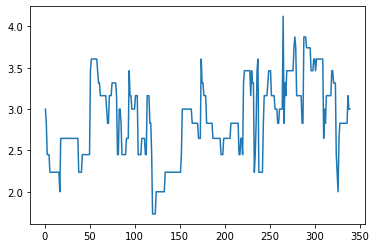

In [28]:
evaluate_error(df_apps_test,df_pred_markov)

We can see that the Markov Model did better than the baseline model

## Integration of the models

We now combine the the markov chain model for state prediction and the linear model for change in battery level

In [29]:
model_linear = Least_Squares_Regression()
model_linear.fit(df_apps_train,y_train,print_weights=True)

bias -1.5181663358138082
packages_running_com.android.musicfx -0.7946384298378613
packages_running_de.kicktipp.mbookmark -0.4590092083386992
packages_running_com.rovio.angrybirdsspace.ads -0.4040538385295749
packages_running_com.google.android.gms -0.24700722539049424
packages_running_com.tf.thinkdroid.sg -0.2280963645369356
packages_running_com.google.android.apps.uploader -0.20428337176192013
packages_running_com.google.android.youtube -0.1724202102274997
packages_running_com.google.android.gm -0.15472513314096767
packages_running_com.google.android.location -0.14543335472026753
packages_running_com.android.defcontainer -0.1407344952897187
packages_running_com.android.chrome -0.13182426343442755
packages_running_com.google.android.partnersetup -0.1279747874863002
packages_running_com.android.contacts -0.07926993331125765
packages_running_com.google.android.googlequicksearchbox -0.015377052122291124
packages_running_com.halfbrick.fruitninjafree 5.543794214388242e-16
packages_running_c

In [30]:
y_pred = model_linear.predict(df_apps_test)

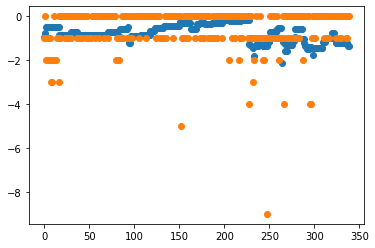

In [31]:
plt.scatter(range(y_pred.shape[0]),y_pred)
plt.scatter(range(y_pred.shape[0]),y_test)
plt.show()

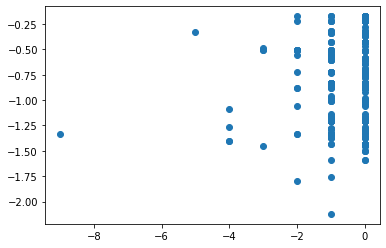

In [32]:
plt.scatter(y_test,y_pred)
plt.show()

In [33]:
np.linalg.norm(y_pred-y_test)

17.951683143795858

## Conclusion
We first predict the user profile, and then use a regression model to estimate change in battery_level.